In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load digits dataset
digits = datasets.load_digits()
print(f"Dataset shape: {digits.images.shape}")

Dataset shape: (1797, 8, 8)


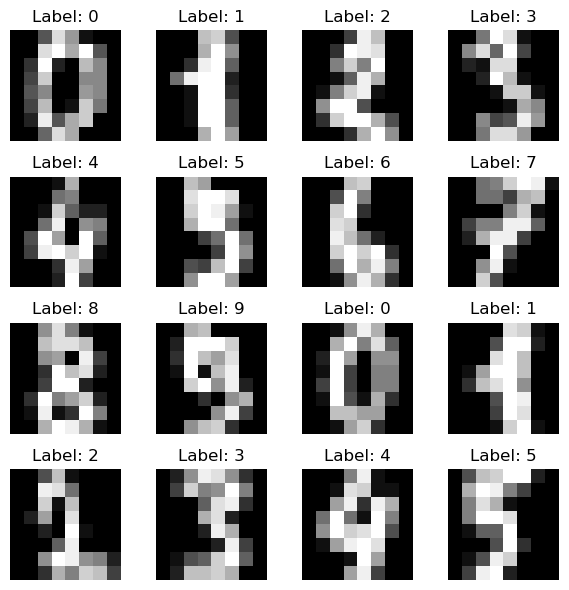

In [3]:
# Plot the first 16 digits
fig, axes = plt.subplots(4, 4, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [4]:
# Flatten the image data
X = digits.images.reshape((len(digits.images), -1))  # (n_samples, 64)
y = digits.target

# Split into training and testing sets
X_train, X_test = X[:1000], X[1000:]
y_train, y_test = y[:1000], y[1000:]

In [5]:
mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic',
                    alpha=1e-4, solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=0.1, verbose=True)

mlp.fit(X_train, y_train)

Iteration 1, loss = 2.22958289
Iteration 2, loss = 1.91207743
Iteration 3, loss = 1.62507727
Iteration 4, loss = 1.32649842
Iteration 5, loss = 1.06100535
Iteration 6, loss = 0.83995513
Iteration 7, loss = 0.67806075
Iteration 8, loss = 0.55175832
Iteration 9, loss = 0.45840445
Iteration 10, loss = 0.39149735
Iteration 11, loss = 0.33676351
Iteration 12, loss = 0.29059880
Iteration 13, loss = 0.25437208
Iteration 14, loss = 0.22838372
Iteration 15, loss = 0.20200554
Iteration 16, loss = 0.18186565
Iteration 17, loss = 0.16461183
Iteration 18, loss = 0.14990228
Iteration 19, loss = 0.13892154
Iteration 20, loss = 0.12833784
Iteration 21, loss = 0.12138920
Iteration 22, loss = 0.11407971
Iteration 23, loss = 0.10677664
Iteration 24, loss = 0.10037149
Iteration 25, loss = 0.09593187
Iteration 26, loss = 0.09250135
Iteration 27, loss = 0.08676698
Iteration 28, loss = 0.08356043
Iteration 29, loss = 0.08209789
Iteration 30, loss = 0.07649168
Iteration 31, loss = 0.07410898
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, random_state=1, solver='sgd',
              verbose=True)

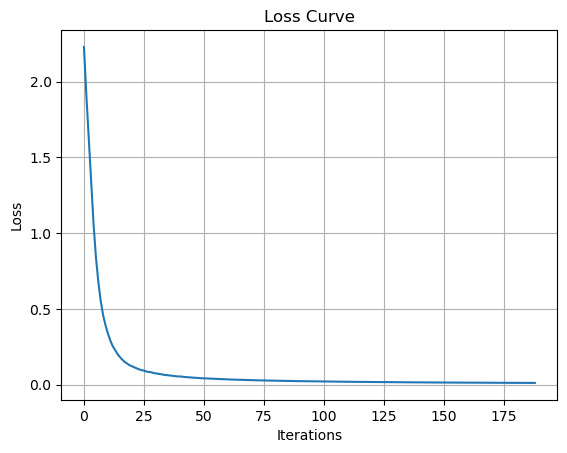

In [6]:
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [7]:
# Predictions
y_pred = mlp.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 91.47%


In [8]:
print("Classification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96        79
           1       0.88      0.89      0.88        80
           2       0.93      0.91      0.92        77
           3       0.86      0.82      0.84        79
           4       0.98      0.95      0.96        83
           5       0.89      0.96      0.92        82
           6       0.98      0.99      0.98        80
           7       0.99      0.95      0.97        80
           8       0.90      0.83      0.86        76
           9       0.81      0.89      0.85        81

    accuracy                           0.91       797
   macro avg       0.92      0.91      0.91       797
weighted avg       0.92      0.91      0.91       797

Confusion Matrix:
 [[75  0  0  1  0  1  1  0  1  0]
 [ 0 71  1  0  0  0  0  0  3  5]
 [ 0  0 70  7  0  0  0  0  0  0]
 [ 0  2  3 65  0  4  0  0  3  2]
 [ 0  1  0  0 79  0  0  0  0  3]
 [ 1  1  0  0  0 79  1  0  0  0]


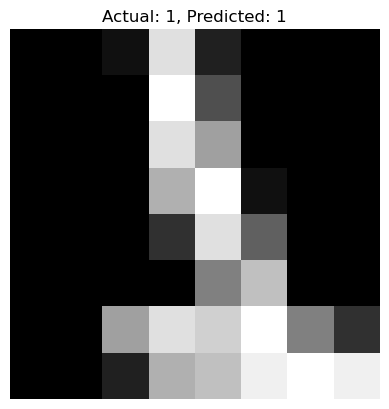

In [9]:
#Testing on a sample image
index = 0  # change this number to test other samples
sample_image = X_test[index].reshape(8, 8)

plt.imshow(sample_image, cmap='gray')
plt.title(f"Actual: {y_test[index]}, Predicted: {y_pred[index]}")
plt.axis('off')
plt.show()